## Dataset Description and Link

> **Dataset Name:** CICDDoS2019

> **Dataset Description:** CICDDoS2019 contains benign and the most up-to-date common DDoS attacks, which resembles the true real-world data (PCAPs). It also includes the results of the network traffic analysis using CICFlowMeter-V3 with labeled flows based on the time stamp, source, and destination IPs, source and destination ports, protocols and attack (CSV files).

> Canadian Institute for Cybersecurity datasets are used around the world by universities, private industry, and independent researchers. 

> **Dataset Link:** ```https://www.unb.ca/cic/datasets/ddos-2019.html```

## Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw=pd.read_csv('Friday-WorkingHours-Afternoon-DDos-pcap_ISCX.csv', sep=',')


In [2]:
print(raw.shape)
raw.head(3)


(225745, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


## Basic EDA

In [3]:
pd.set_option('display.max_rows', None)

#removing extra space from the column labels
raw.columns = raw.columns.str.strip()


count=1
dataset_col = []
for col in raw.columns:
    dataset_col.append(col.strip())
    # print(f"{count}: {col}")
    count+=1

print('Total Columns: ', dataset_col)

print(f"\nshape:",raw.shape)

print("Missing Values: ",raw.isna().sum().sum())


Total Columns:  ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count',

We can fill up missing values in column 'Flow Bytes/s' with either median/mode/mean.

In [4]:
# it tells Pandas how to print float values, replacing scientific notation with regular formatting.
pd.set_option("display.float_format", "{:.0f}".format) 

#stats of the dataframe
print(f"mode: {raw['Flow Bytes/s'].mode()}\n\nraw.describe(): \n{raw['Flow Bytes/s'].describe()}")

mode: 0   0
Name: Flow Bytes/s, dtype: float64

raw.describe(): 
count      225741
mean          inf
std           NaN
min     -12000000
25%            12
50%          1137
75%         21597
max           inf
Name: Flow Bytes/s, dtype: float64


c:\Users\xst-haid3772\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


**Infinite Values:**
> Since we've identified infinite values in our dataset when checking for stats in a column 'Flow Bytes/s', we'll look for total num of infinite values in our dataset, replace them all with the NaN values and then proceed with the EDA further.

In [5]:
def infinite_val_count (dataset):
    numeric_col = dataset.select_dtypes(include=np.number)
    inf_count = np.isinf(numeric_col).sum().sum()
    print("Total infinite values:", inf_count)
infinite_val_count(raw)

Total infinite values: 64


***We got total of 64 infinite values in our dataset***
```
np.isinf(raw.select_dtypes(include=np.number)).sum().sum()
```

Or 

```
print(f'Total Infinite Values: ',raw.isin([np.inf,-np.inf]).sum().sum())
```
output: 64

#### Handle Infinite values
> We replace Infinite values with NaN

In [6]:
clean_traffic = raw.copy()

# replace infinite values with NaN's
clean_traffic = clean_traffic.replace([np.inf, -np.inf], np.nan)

In [7]:
# check total infintie and missing values in dataset again

infinite_val_count(clean_traffic)
print(f'Missing values count: ',clean_traffic.isna().sum().sum())

Total infinite values: 0
Missing values count:  68


**Note:** We could also fix/handle infinite values for each column separately such as below;

> ```raw['Flow Bytes/s'].isin([np.inf, -np.inf]).sum()```

> ```raw['Flow Bytes/s] = raw['Flow Bytes/s].replace([np.inf, -np.inf], np.nan)```

#### Fill up columns with missing values

In [8]:
# see columns only with missing values

missing = clean_traffic.isna().sum()
print("Columns with their missing values:\n",missing[missing>0])

Columns with their missing values:
 Flow Bytes/s      34
Flow Packets/s    34
dtype: int64


#### Try taking stats of the columns again

> Since we've removed all Infinite values with NaN so it is possible now to look at the stats of these columns

In [9]:
# Since we've removed all Infinite values with NaN so it is possible now to look at the stats of these columns

# Summary/stats of the 'Flow Bytes/s' without infinite values 
print(f"mode: {clean_traffic['Flow Bytes/s'].mode()}\n\nraw.describe(): \n{clean_traffic['Flow Bytes/s'].describe()}")

mode: 0   0
Name: Flow Bytes/s, dtype: float64

raw.describe(): 
count       225711
mean        585394
std       16885520
min      -12000000
25%             12
50%           1133
75%          21580
max     2070000000
Name: Flow Bytes/s, dtype: float64


In [10]:
# Summary/stats of the 'Flow Packets/s' without infinite values 
print(f"mode: {clean_traffic['Flow Packets/s'].mode()}\n\nraw.describe(): \n{clean_traffic['Flow Packets/s'].describe()}")

mode: 0   666667
Name: Flow Packets/s, dtype: float64

raw.describe(): 
count     225711
mean       14241
std       115104
min     -2000000
25%            1
50%            5
75%           70
max      3000000
Name: Flow Packets/s, dtype: float64


#### Fill Up Missing Values with Median of the 

> Since **Flow Bytes/s** and **Flow Packets/s** are highly skewed, the median better represents the typical value compared to mean or mode without introducing bias, making it the safe choice for filling missing values in skewed numerical columns.

In [11]:
clean_traffic['Flow Bytes/s'] = clean_traffic['Flow Bytes/s'].fillna(clean_traffic['Flow Bytes/s'].median())
clean_traffic['Flow Packets/s'] = clean_traffic['Flow Packets/s'].fillna(clean_traffic['Flow Packets/s'].median())

#### Confirm if datset is clean now

In [12]:
print("Missing Values: ",clean_traffic.isna().sum().sum())
print("Infinite Values: ",np.isinf(clean_traffic.select_dtypes(include=np.number)).sum().sum())

Missing Values:  0
Infinite Values:  0


In [13]:
type(clean_traffic)

pandas.core.frame.DataFrame

## Cental Limit Theorem (CLT)

> 


In [14]:
population = clean_traffic['Flow Duration'].dropna()
sample_size = 500
n_simulations = 500
sample_means = []

for _ in range(n_simulations):
    sample = np.random.choice(population, size=sample_size)
    sample_means.append(np.log(sample.mean()))

print(f'Mean: {np.mean(sample_means)}\nMedian: {np.median(sample_means)}\nStd: {np.std(sample_means)}')

population.count()

Mean: 16.594831132531095
Median: 16.600398663527887
Std: 0.08965579791800254


np.int64(225745)

In [15]:
population.describe()

count      225745
mean     16241649
std      31524374
min            -1
25%         71180
50%       1452333
75%       8805237
max     119999937
Name: Flow Duration, dtype: float64

## Logarithm Transformation for Sample Mean

**```population.describe() shows:```**

> data appended in ```sample_means``` is extremely right-skewed with very high values such as:
> - ```mean (16.24 million)```
> - ```median(14.52 million)```
> - ```max values (119.99million)```

which guarantees the distribution would also be very right-skewed, so the plots.

So we applied natural logarithm (ln) `np.log`  to each appended Mean value

**Purpose of log transform:**

> - Reduces right-skewed data 

> - Compresses large values and spreads out small values.

> - Helps linear models fit better and makes patterns clearer.

Text(0, 0.5, 'Frequency')

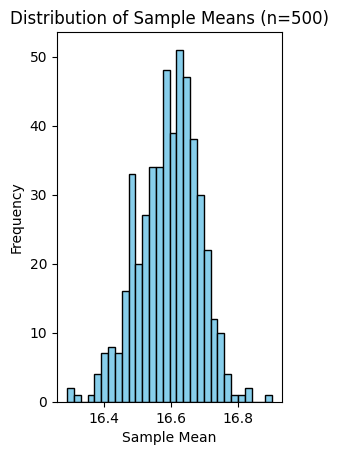

In [16]:
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of Sample Means (n={sample_size})')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

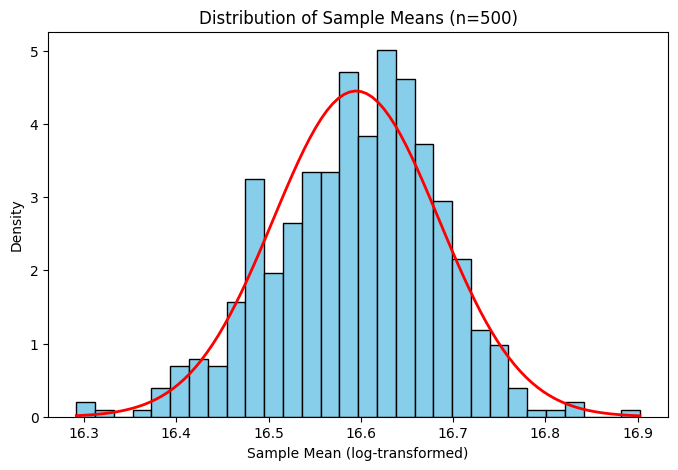

In [17]:
# I took AI assistance to plot this nice graph

from scipy.stats import norm

plt.figure(figsize=(8,5))
plt.hist(sample_means, bins=30, color='skyblue', edgecolor='black', density=True)
mu, sigma = np.mean(sample_means), np.std(sample_means)
x = np.linspace(min(sample_means), max(sample_means), 100)
plt.plot(x, norm.pdf(x, mu, sigma), color='red', lw=2)
plt.title(f'Distribution of Sample Means (n={sample_size})')
plt.xlabel('Sample Mean (log-transformed)')
plt.ylabel('Density')
plt.show()


> As we Increased the sample size and number of simulations, the more symmetric sampling distribution we get while narrowing the std. 

## Flow Duration b/w Benign and Attack data?

In [18]:
print(clean_traffic['Label'].unique())

['BENIGN' 'DDoS']


Benign Mean: 16.541016634740597
Benign Median: 16.54355461667199
Benign Std: 0.09363005189488073
Benign Total Count:  97718
Attack Mean: 16.64190874588062
Attack Median: 16.648302371560614
Attack Std: 0.08578296440205155
Attack Total Count:  128027
Observed Mean Diff: 10.09%


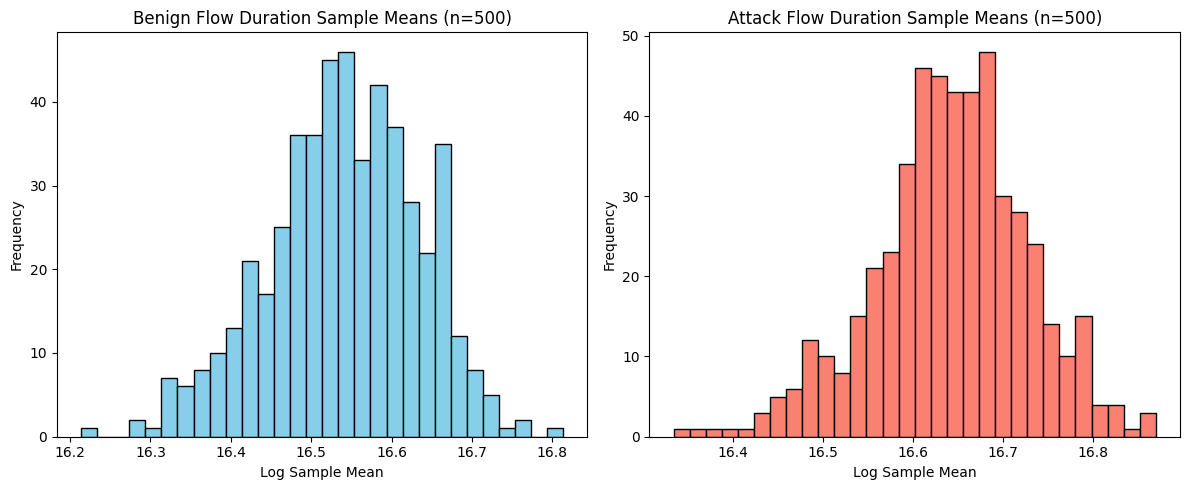

In [19]:

def observed_mean(dataset):

    rng = np.random.default_rng(seed=42)  # modern RNG — faster/better than legacy

    benign_flow_dur = dataset[dataset['Label'] == 'BENIGN']['Flow Duration'].dropna()
    attack_flow_dur = dataset[dataset['Label'] == 'DDoS']['Flow Duration'].dropna()

    benign_means = []
    attack_means = []
    
    for _ in range(n_simulations):
        sample_benign = rng.choice(benign_flow_dur, size=sample_size, replace=True)
        benign_means.append(np.log(sample_benign.mean()))

        sample_attack = rng.choice(attack_flow_dur, size=sample_size, replace=True)
        attack_means.append(np.log(sample_attack.mean()))
        
    obs_diff = np.mean(attack_means) - np.mean(benign_means)
    return obs_diff, benign_flow_dur, attack_flow_dur, benign_means, attack_means

observed_mean(clean_traffic)

observed_value, benign_flow_dur, attack_flow_dur, benign_means, attack_means  = observed_mean(clean_traffic)


print(f'Benign Mean: {np.mean(benign_means)}\nBenign Median: {np.median(benign_means)}\nBenign Std: {np.std(benign_means)}')
print(f'Benign Total Count: ',benign_flow_dur.count())

print('='*50)

print(f'Attack Mean: {np.mean(attack_means)}\nAttack Median: {np.median(attack_means)}\nAttack Std: {np.std(attack_means)}')
print(f'Attack Total Count: ',attack_flow_dur.count())

print('='*50)

# attack_benign_obs_diff = np.mean(attack_flow_means) - np.mean(benign_flow_means)
print(f'Observed Mean Diff: {observed_value*100:.2f}%' )

plt.figure(figsize=(12, 5))

# Plot 1: Benign
plt.subplot(1, 2, 1)
plt.hist(benign_means, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Benign Flow Duration Sample Means (n={sample_size})')
plt.xlabel('Log Sample Mean')
plt.ylabel('Frequency')

# Plot 2: Attack
plt.subplot(1, 2, 2)
plt.hist(attack_means, bins=30, color='salmon', edgecolor='black')
plt.title(f'Attack Flow Duration Sample Means (n={sample_size})')
plt.xlabel('Log Sample Mean')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Observed Mean Difference --> 10.09%

> Results shows that the avg time duration of the attack packets is 10% higher than the benign traffic and the std is very small in both cases. All these stats confirm that the feature flow_duration among the other stated 78 features, is a reliable metric for comparing benign vs attack traffic and is useful for further modeling and detection.   

#### Hypothesis:
Is the observed difference (10%) in flow_duration b/w benign and attack traffic is real or just by random chance?

**Null Hypothesis:** The observed difference in flow_duration b/w benign and attack traffic is by chance and it doesn't help us differentiating the attack and benign traffic (labels doesn't matter).

**Alternate Hypothesis:** The observed difference in flow_duration b/w attack and benign traffic is real and we can use it as a potential feature while detecting malicious/attack traffic into the network (labeling matters).



# Permutation

In [20]:
perm_list = [observed_value]
simulated_traffic = clean_traffic.copy()

for _ in range(n_simulations):

    rng = np.random.default_rng(seed=42)
    simulated_traffic['Label'] = rng.permutation(simulated_traffic['Label']) # shuffle section labels here
    simulated_traffic_mean_diff, *_ = observed_mean(simulated_traffic) # calculating mean diff in simulated dataframe
    perm_list.append(simulated_traffic_mean_diff)

# you can now view the mean differences we got in perm_list

permuted_df = pd.DataFrame({"df": perm_list})

# computes the proportion of permuted differences that are greater than or equal the observed difference.
print(f'p-value: {np.mean(permuted_df.df >= observed_value)}')
    

p-value: 0.001996007984031936


```np.random.shuffle``` requires a list

```np.random.permutation``` works on Series directly

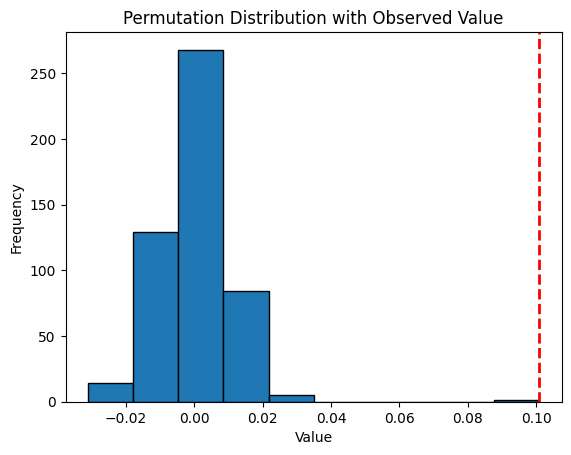

In [21]:
import matplotlib.pyplot as plt

plt.hist(permuted_df, bins=10, edgecolor='black')

plt.axvline(observed_value, color='red', linestyle='--', linewidth=2)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Permutation Distribution with Observed Value")
plt.show()

############################################################################################################
## p-value calculation

```
permuted_df.df >= observed_value
```
this above expression creates a Boolean list and returns a list like [False, False, True, False, True, ...]

Each value is:

> True → this is ≥ observed

> False → this is < observed

In Python:

> True = 1

> False = 0

```np.mean()``` takes the average

So if 3 out of 1000 replicates are ≥ observed
```
np.mean([False, False, ..., True, True, True])  
= 3 / 1000  
= 0.003
```
This is exactly the p-value.

############################################################################################################

In [22]:
values = permuted_df.df >= observed_value
print(f'Total values >= observed_value: {values.count()}')
print(f'Total values > observed values: {values[values>observed_value].count()}') # value that is True
print(f'p-value (True count / Total Count): {values[values>observed_value].count()/ values.count()*100:.2f}%')

Total values >= observed_value: 501
Total values > observed values: 1
p-value (True count / Total Count): 0.20%


# Results Interpretation

> The distribution that we got under the null hypothesis after permutation shows that the mean differences that we got after shuffling/permuting the labels, are far and not as extreme as our observed diff is.

> Only .20% of the random labelings (less than 5%) produce a mean difference as large as the observed diff which is an emperical evidence that labeling matters and we reject the null hypothesis and that flow_duration into the dataset CICIDS2019 is a meaningful and discriminative feature to distinguish b/w benign and attack traffic.